### 1.7 Визуализация ### 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

%matplotlib inline

In [115]:
# функция-дополнение к стандартному пандовому describe

def count_basic_stat(df):
    basic_stat = df.describe()
    
    for i in df:
        try:
            basic_stat.loc['moda',i] = statistics.mode(df[i])
                
        except:
            basic_stat.loc['moda',i] = 'Моды нет'
            
    return basic_stat

In [2]:
students_df = pd.read_csv('C:/work/Datasets/DS_Intro/StudentsPerformance.csv')

In [5]:
students_df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
students_df.columns = students_df.columns.str.lower()
students_df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)

**Pandas + Matplotlib**

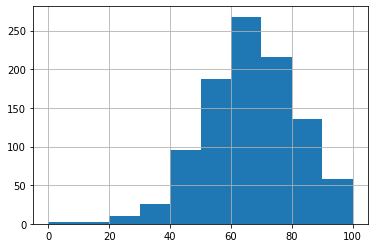

In [6]:
students_df.math_score.hist()

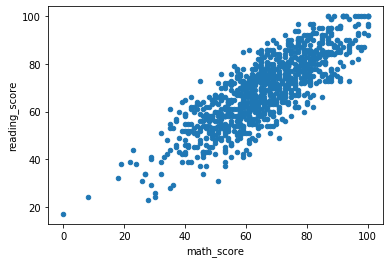

In [7]:
students_df.plot.scatter(x='math_score', y='reading_score')

**Seaborn**

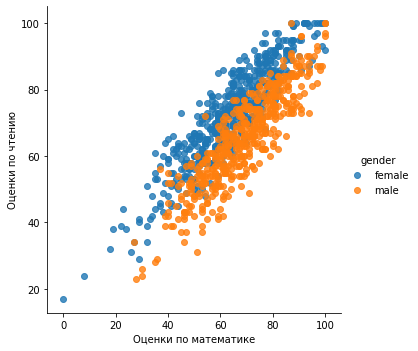

In [13]:
ax = sns.lmplot(x='math_score', y='reading_score', data=students_df, hue='gender', fit_reg=False)
ax.set_xlabels('Оценки по математике')
ax.set_ylabels('Оценки по чтению')

In [38]:
test_df = pd.read_csv('C:/work/Datasets/DS_Intro/dataset_209770_6.txt', sep=(' '))
test_df.head()

,x,y
0,207.358985,787.560862
1,805.401197,593.823629
2,1416.993844,1303.299052
3,582.690910,110.233558
4,1303.504536,695.560726


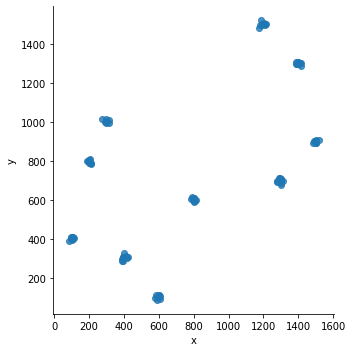

In [39]:
sns.lmplot(x='x', y='y', data=test_df, fit_reg=False)

In [40]:
genome_df = pd.read_csv('https://stepik.org/media/attachments/course/4852/genome_matrix.csv')
genome_df.head(2)

,Unnamed: 0,species0,species1,species2,species3,species4
0,species0,0.536029,0.920292,0.679708,0.840606,0.430842
1,species1,0.920292,0.862417,0.887593,0.769754,0.203214


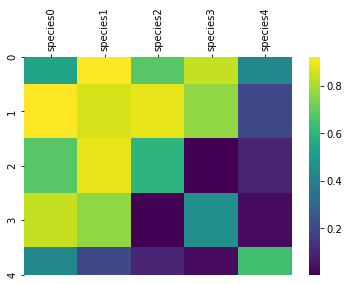

In [45]:
g = sns.heatmap(genome_df.iloc[:,1:], cmap='viridis')
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)

In [96]:
df_dota = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv')
df_dota.head()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [97]:
def count_len_list(row):
    return row.roles.count(',') + 1

In [98]:
df_dota['role_number'] = df_dota.apply(count_len_list, axis=1)

In [ ]:
#df_dota['role_number'] = df_dota['roles'].str.split(',').str.len()

In [99]:
df_dota.head()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles,role_number
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']",3
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']",4
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']",4
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini...",5
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']",4


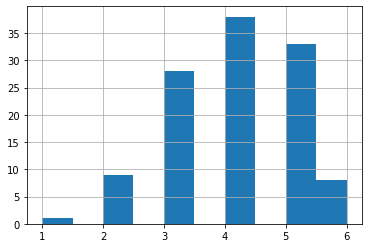

In [101]:
df_dota.role_number.hist()

In [82]:
df_dota.role_number.value_counts()

3    38
4    33
2    28
1     9
5     8
0     1
Name: role_number, dtype: int64

In [134]:
df_iris = pd.read_csv('https://stepik.org/media/attachments/course/4852/iris.csv')
df_iris.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)

In [135]:
df_iris.head()

,Unnamed:_0,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0


In [136]:
df_iris.iloc[:,1:]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [137]:
count_basic_stat(df_iris.iloc[:,1:])

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
mean,5.843333,3.054000,3.758667,1.198667,1
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0
25%,5.100000,2.800000,1.600000,0.300000,0
50%,5.800000,3.000000,4.350000,1.300000,1
75%,6.400000,3.300000,5.100000,1.800000,2
max,7.900000,4.400000,6.900000,2.500000,2
moda,5.000000,3.000000,1.500000,0.200000,Моды нет


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B1A9C789C8>,
      dtype=object)

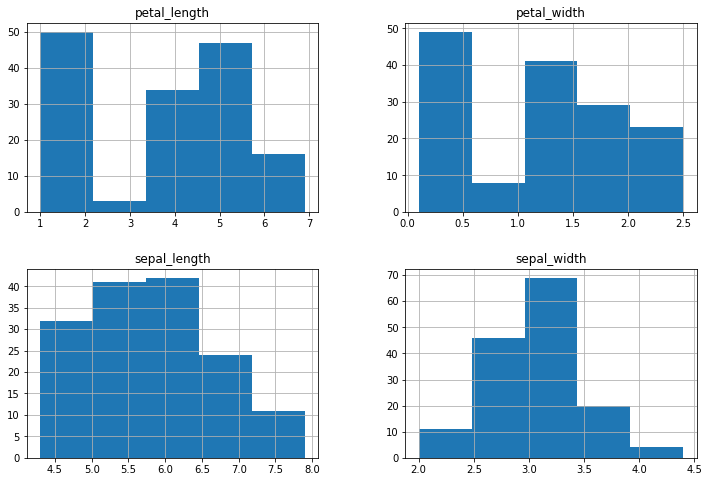

In [161]:
df_iris.iloc[:,1:5].hist(figsize=(12, 8), bins=5)

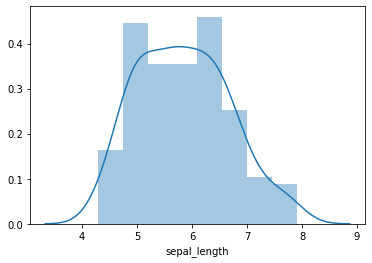

In [139]:
sns.distplot(df_iris['sepal_length'])

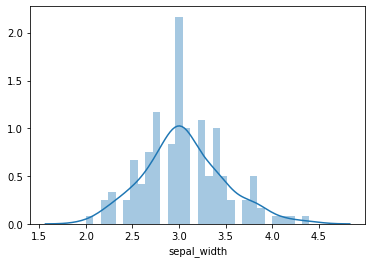

In [155]:
sns.distplot(df_iris.sepal_width, bins=30)

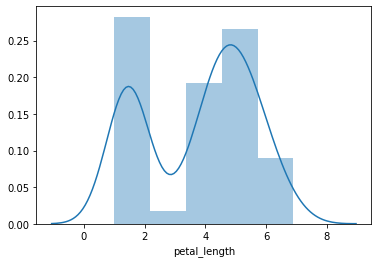

In [157]:
sns.distplot(df_iris.petal_length)

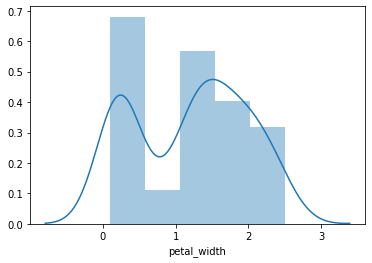

In [142]:
sns.distplot(df_iris['petal_width'])

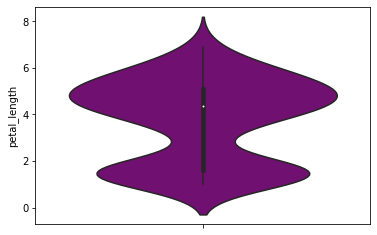

In [146]:
sns.violinplot(y="petal_length", data=df_iris, color='purple');

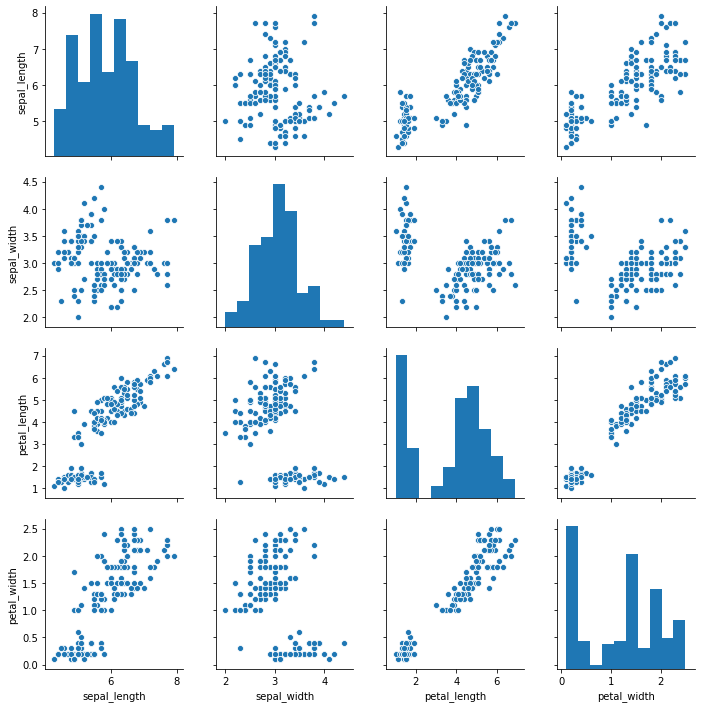

In [150]:
sns.pairplot(df_iris.iloc[:,1:5])